# Stock Market Analysis - Predicting the impact of Corona on stocks.  
Group Members: 
* Ashwin Nair

* Haolun Li

* **1.Introduction**
  * 1.1 Dataset Overview
  * 1.2 Goal of the project
  * 1.3 Forecasting
  
* **2.Pre-Processing and data cleaning** 
  * 2.1 Data extraction  

* **3.Exploratory data analysis**
  * 3.1 Descriptive Statistics
  * 3.2 Visualizations
  * 3.3 Checking correlation between variables  

* **4.Forecast Model**
  * 4.1 Introduction
  * 4.2 Evaluating Performance
  * 4.3 Analyzing Results 

* **5.Summary and Conclusion**

# 1.Introduction 

**Data:** We are looking at real-time data, particularly six stocks that saw either an increase or decrease over the last two months of economic downfall. The companies we shall be choosing fall in diverse industries mainly - tech,retail,aviation, automobile etc. The idea behind it was to understand any significant impact across the spectrum of business.

* **High** - Refers to the highest price at a given period of time

* **Low** - Refers to the lowest price at a given period of time

* **Open** - Price at which markets open and trading starts

* **Close** - Price at which markets close and trading stops

* **Volume** - Amount of shares bought/sold of a stock in a given period of time

* **Adj Close** - Closing price after adjustements for all applicable splits and dividends

* **CompanyName** - Name of the company 



**Goal:** To identify and visualize stock market data by measuring the impact of Coronavirus on these companies. To display a time series analysis to forecast the stock prices in the future.

* **Change in Stock Prices over time**
* **Daily return on Stock on Average**
* **Moving Averages of stocks**
* **Correlation between stocks**
* **Predict future stock behavior**


# 2.Pre-Processing and Data Cleaning 

## 2.1 Data Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline

import yfinance as yf
from datetime import datetime

import io, os, sys, types

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [2]:
comp_list = ['AAPL', 'ZOOM', 'UAL', 'TSLA', 'GILD', 'CAKE']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [3]:
# Import each company stock historical data into separate data frames. Add column indicating the company name
from finalscript import getCompanyData

st1 = getCompanyData('AAPL', start, end, 'Apple')


st2 = getCompanyData('ZOOM', start, end, 'Zoom Technologies')


st3 = getCompanyData('UAL', start, end,'United Airlines')


st4 = getCompanyData('TSLA', start, end,'Tesla')

st5 = getCompanyData('GILD', start, end,'Gilead Sciences Inc')


st6 = getCompanyData('CAKE', start, end,'The CheeseCake Factory')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
data = pd.concat([st1, st2, st3, st4, st5, st6], axis=0, join='outer', ignore_index=False)

In [5]:
st1.sample(10)

,Open,High,Low,Close,Adj Close,Volume,CompanyName
Date,,,,,,,
2019-07-19,205.789993,206.500000,202.360001,202.589996,200.742645,20929300,Apple
2019-12-31,289.929993,293.679993,289.519989,293.649994,292.954712,25201400,Apple
2019-11-05,257.049988,258.190002,256.320007,257.130005,255.753372,19974400,Apple
2019-11-22,262.589996,263.179993,260.839996,261.779999,261.160187,16331300,Apple
2019-12-19,279.500000,281.179993,278.950012,280.019989,279.356995,24592300,Apple
2019-08-30,210.160004,210.449997,207.199997,208.740005,207.622437,21143400,Apple
2019-12-26,284.820007,289.980011,284.700012,289.910004,289.223602,23280300,Apple
2020-01-07,299.839996,300.899994,297.480011,298.390015,297.683533,27218000,Apple
2019-11-25,262.709991,266.440002,262.519989,266.369995,265.739319,21005100,Apple


In [6]:
data.sample(10)

,Open,High,Low,Close,Adj Close,Volume,CompanyName
Date,,,,,,,
2019-03-29,64.900002,65.629997,64.650002,65.010002,62.624577,9601400,Gilead Sciences Inc
2019-11-19,43.980000,44.040001,42.590000,42.639999,42.152996,583100,The CheeseCake Factory
2019-07-12,202.449997,204.000000,202.199997,203.300003,201.446182,17595200,Apple
2019-05-10,66.040001,66.279999,64.120003,65.570000,63.164032,5953400,Gilead Sciences Inc
2019-11-18,1.750000,2.050000,1.750000,2.020000,2.020000,11485,Zoom Technologies
2020-02-07,322.369995,323.399994,318.000000,320.029999,320.029999,29421000,Apple
2019-09-09,3.000000,3.540000,2.660000,3.000000,3.000000,13218,Zoom Technologies
2019-10-21,237.520004,240.990005,237.320007,240.509995,239.222336,21811800,Apple
2019-09-10,41.799999,43.480000,41.230000,43.290001,42.438942,874100,The CheeseCake Factory


# 3.Exploratory data analysis  

## 3.1 Descriptive Statistics 

In [7]:
from finalscript import getDescriptiveStat
getDescriptiveStat(data)

              Open         High          Low        Close    Adj Close  \
count  1512.000000  1512.000000  1512.000000  1512.000000  1512.000000   
mean    130.164770   132.640727   127.859716   130.298915   129.718222   
std     143.634728   147.762301   139.834536   143.862158   143.933411   
min       0.260000     0.300000     0.050000     0.280000     0.280000   
25%      41.094999    42.014999    40.204999    40.965001    40.171905   
50%      70.084999    72.400002    68.369999    69.520000    68.978451   
75%     213.292503   215.592499   210.487495   212.700001   211.425385   
max     923.500000   968.989990   901.020020   917.419983   917.419983   

             Volume  
count  1.512000e+03  
mean   9.886170e+06  
std    1.401408e+07  
min    0.000000e+00  
25%    7.338000e+05  
50%    4.686150e+06  
75%    1.367370e+07  
max    1.067212e+08  


## 3.2 Visualizations

#### Change in Stock prices over time - Plotting Historical view of closing price.

<Figure size 1440x720 with 0 Axes>

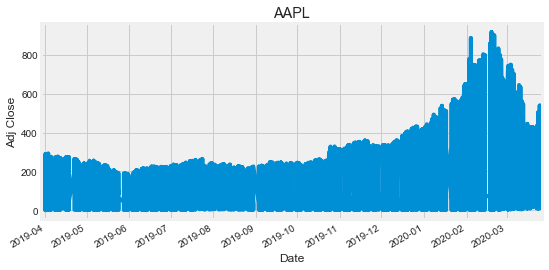

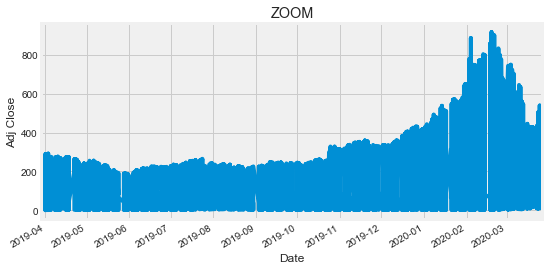

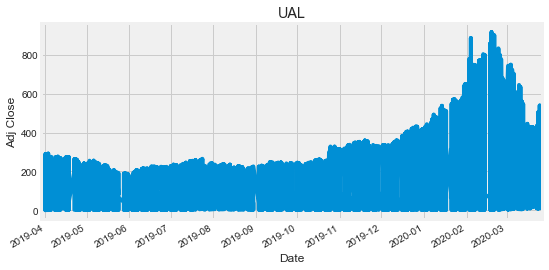

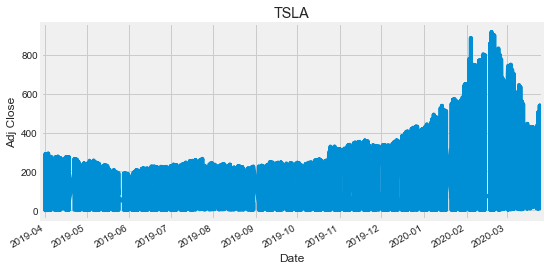

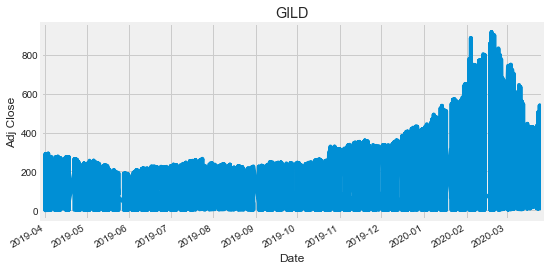

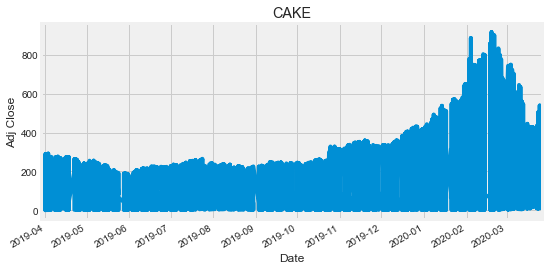

In [8]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(comp_list, 1):
    
    fig, axs = plt.subplots(1, figsize=(8, 4), sharey=True)
    plt.ylabel('Adj Close')
    plt.title(f"{comp_list[i - 1]}")
    data['Adj Close'].plot()
    plt.show()

Every stock shows a positive trend during the start of 2020 and suddenly sees a fall around mid March. Our aim is to find out the impact or risk each stock faces and identify any patterns if any.

#### Plotting Historical view of Volume.

<Figure size 720x360 with 0 Axes>

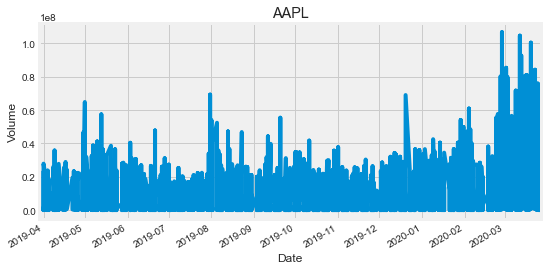

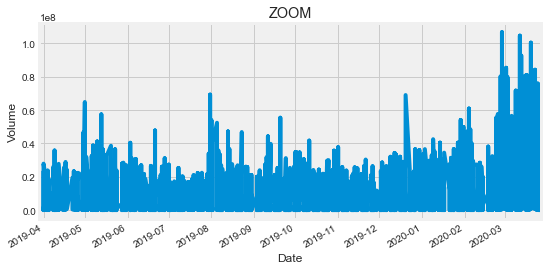

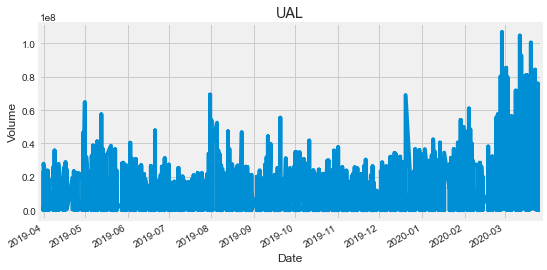

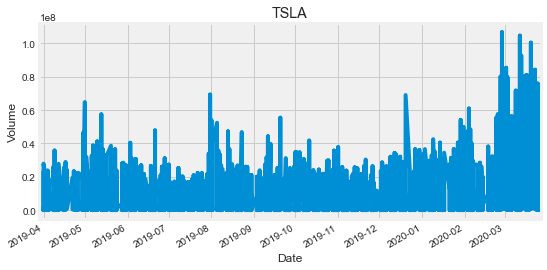

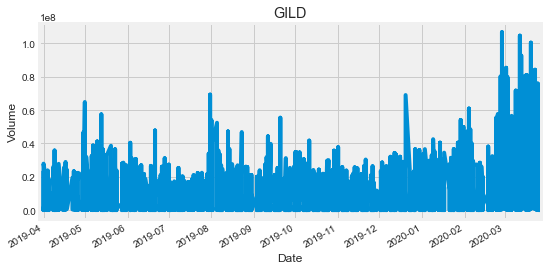

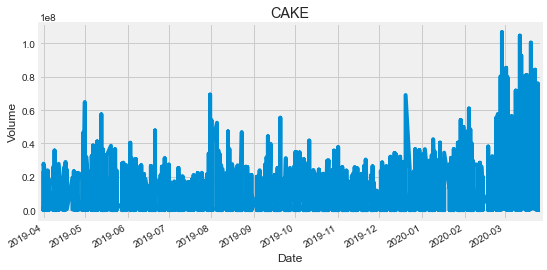

In [9]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(comp_list, 1):
    
    fig, axs = plt.subplots(1, figsize=(8, 4), sharey=True)
    plt.ylabel('Volume')
    plt.title(f"{comp_list[i - 1]}")
    data['Volume'].plot()
    plt.show()

Volume shows major activity in the past month and it would be interesting to understand the biggest movers

#### Finding out the dates of maximum and minimum trading for the 6 stocks

In [10]:
print("Apple Max:", (st1['Volume'].idxmax()))
print("Apple Min:", (st1['Volume'].idxmin()))

print("Zoom Max:", (st2['Volume'].idxmax()))
print("Zoom Min:", (st2['Volume'].idxmin()))

print("UAL Max:", (st3['Volume'].idxmax()))
print("UAL Min:", (st3['Volume'].idxmin()))

print("TESLA Max:", (st4['Volume'].idxmax()))
print("TESLA Min:", (st4['Volume'].idxmin()))

print("Gilead Max:", (st5['Volume'].idxmax()))
print("Gilead Min:", (st5['Volume'].idxmin()))

print("CheeseCake Max:", (st6['Volume'].idxmax()))
print("CheeseCake Min:", (st6['Volume'].idxmin()))




Apple Max: 2020-02-28 00:00:00
Apple Min: 2019-07-03 00:00:00
Zoom Max: 2019-04-18 00:00:00
Zoom Min: 2019-11-19 00:00:00
UAL Max: 2020-03-20 00:00:00
UAL Min: 2019-12-24 00:00:00
TESLA Max: 2020-02-04 00:00:00
TESLA Min: 2019-11-29 00:00:00
Gilead Max: 2020-02-27 00:00:00
Gilead Min: 2019-12-24 00:00:00
CheeseCake Max: 2020-03-26 00:00:00
CheeseCake Min: 2019-11-29 00:00:00


* Apple saw the maximum volume being traded in February
* Zoom, surprisingly saw the maximum and minimum last year
* United Airlines saw the largest volume traded this month
* Tesla saw the maximum volume traded in March
* Gilead Sciences saw the largest volume traded in February
* CheeseCake Factory saw the largest volume traded this week

#### Creating column 'Total Traded' = Open Price * Volume 


In [11]:
#Dollars traded for the day
st6['Total Traded'] = st6['Open'] * st6['Volume']
st3['Total Traded'] = st3['Open'] * st3['Volume']
st5['Total Traded'] = st5['Open'] * st5['Volume']

st1['Total Traded'] = st1['Open'] * st1['Volume']
st2['Total Traded'] = st2['Open'] * st2['Volume']
st4['Total Traded'] = st4['Open'] * st4['Volume']


Text(0, 0.5, 'Total Traded')

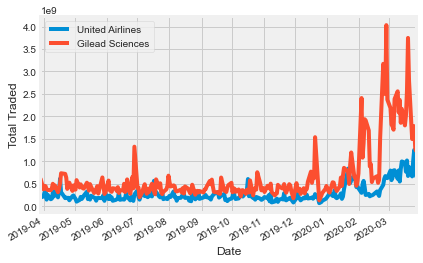

In [12]:
# Plotting 'Total Trded' for UAL & Gilead stocks against time

st3['Total Traded'].plot(label = 'United Airlines')
st5['Total Traded'].plot(label = 'Gilead Sciences')
plt.legend()
plt.ylabel('Total Traded')

Gilead Sciences saw a lot of activity owing to the pandemic and a massive spike from February. 
United Airline saw a dip but managed to recover and improve gradually.

Text(0, 0.5, 'Total Traded')

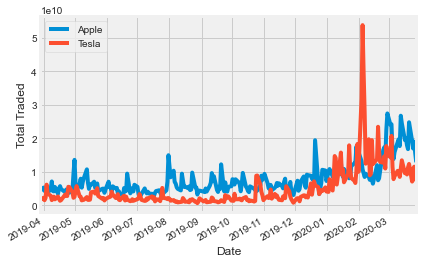

In [13]:
# Plotting 'Total Trded' for Apple & Tesla stocks against time
st1['Total Traded'].plot(label = 'Apple')
st4['Total Traded'].plot(label = 'Tesla')
plt.legend()
plt.ylabel('Total Traded')

Tesla saw a significant rise in their Total Traded in Febraury, wheras Apple has been on a constant increase and is overall leading in average.

#### Moving Averages of the stocks

In [14]:
mavg_day = [10, 20, 50]

for ma in mavg_day:
    for company in comp_list:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Adj Close'].rolling(ma).mean()

In [15]:
maverage_day = [10, 20, 50]

for ma in maverage_day:
    for company in comp_list:
        column_name = f"MA for {ma} days"
        st1[column_name] = st1['Adj Close'].rolling(ma).mean()
        st2[column_name] = st2['Adj Close'].rolling(ma).mean()
        st3[column_name] = st3['Adj Close'].rolling(ma).mean()
        st4[column_name] = st4['Adj Close'].rolling(ma).mean()
        st5[column_name] = st5['Adj Close'].rolling(ma).mean()
        st6[column_name] = st6['Adj Close'].rolling(ma).mean()
        

In [16]:
data.sample(10)

,Open,High,Low,Close,Adj Close,Volume,CompanyName,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2019-10-28,91.830002,92.800003,91.779999,92.190002,92.190002,1841000,United Airlines,90.115999,87.885499,87.146800
2020-01-13,39.340000,39.770000,39.250000,39.400002,38.950001,460300,The CheeseCake Factory,38.820496,38.963346,40.982869
2019-05-20,81.389999,82.480003,81.000000,81.739998,81.739998,2355600,United Airlines,83.292000,85.736500,64.158200
2019-10-24,90.589996,91.510002,89.220001,89.809998,89.809998,2283500,United Airlines,89.144999,87.521499,86.761400
2019-10-23,242.100006,243.240005,241.220001,243.179993,241.878036,18957200,Apple,235.452631,228.756177,218.629983
2020-03-11,50.529999,51.230000,48.049999,49.340000,49.340000,10899400,United Airlines,55.792000,66.540500,76.755600
2019-08-20,64.040001,64.309998,63.380001,63.439999,61.694206,5286400,Gilead Sciences Inc,62.131823,63.066378,64.513943
2019-05-07,205.880005,207.419998,200.830002,202.860001,200.239075,38763700,Apple,203.810327,201.374209,NaN
2020-01-16,313.589996,315.700012,312.089996,315.239990,314.493591,27207300,Apple,306.770935,296.680385,277.699541


We have added the new moving average columns for the dataset. Plotting the additional moving averages

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

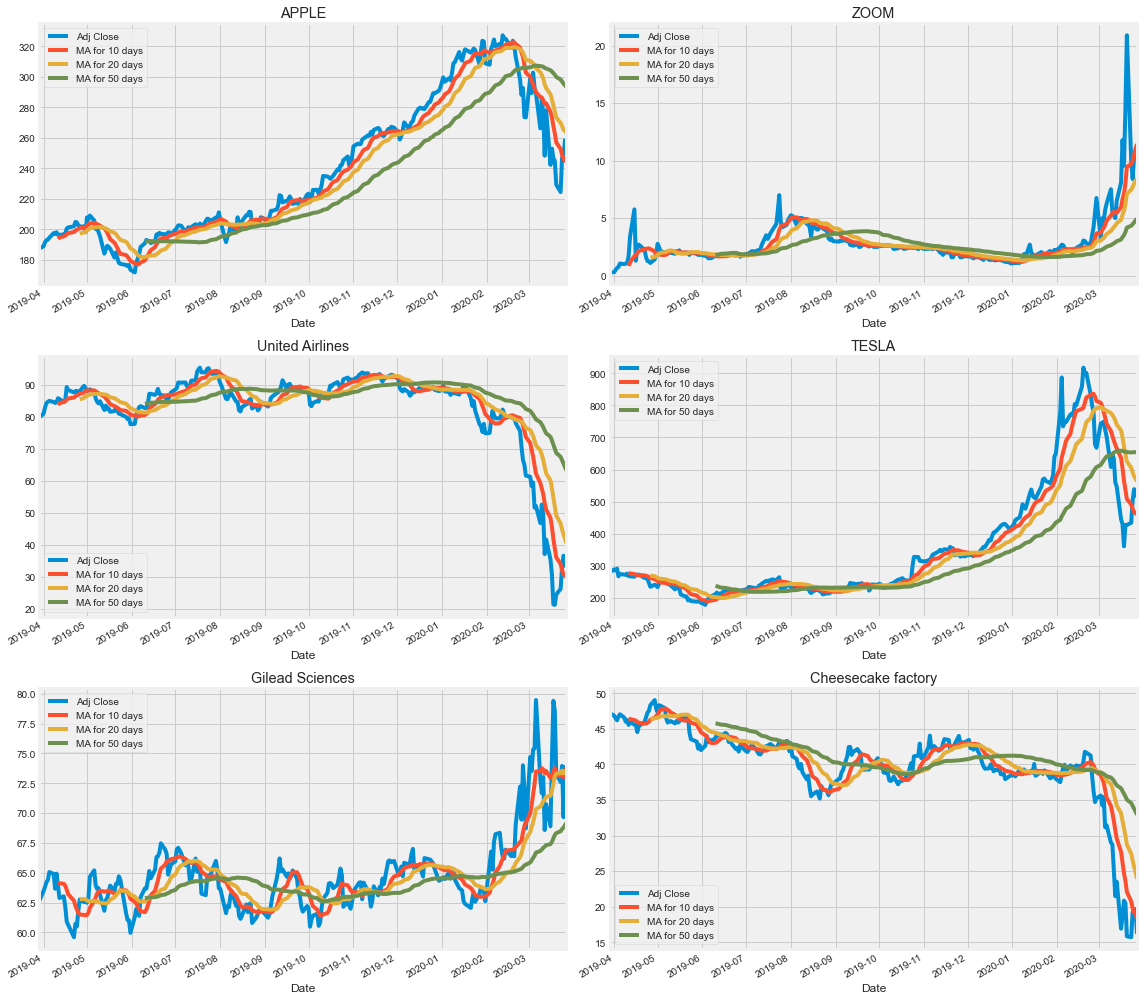

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(14)
fig.set_figwidth(16)



st1[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

st2[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('ZOOM')

st3[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('United Airlines')

st4[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

st5[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Gilead Sciences')

st6[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Cheesecake factory')

fig.tight_layout()


This gives an idea of the sudden increases and decreases endured by the company stocks and what an investor has to keep in mind while contemplating to trade during this period.

#### Daily Average Return

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

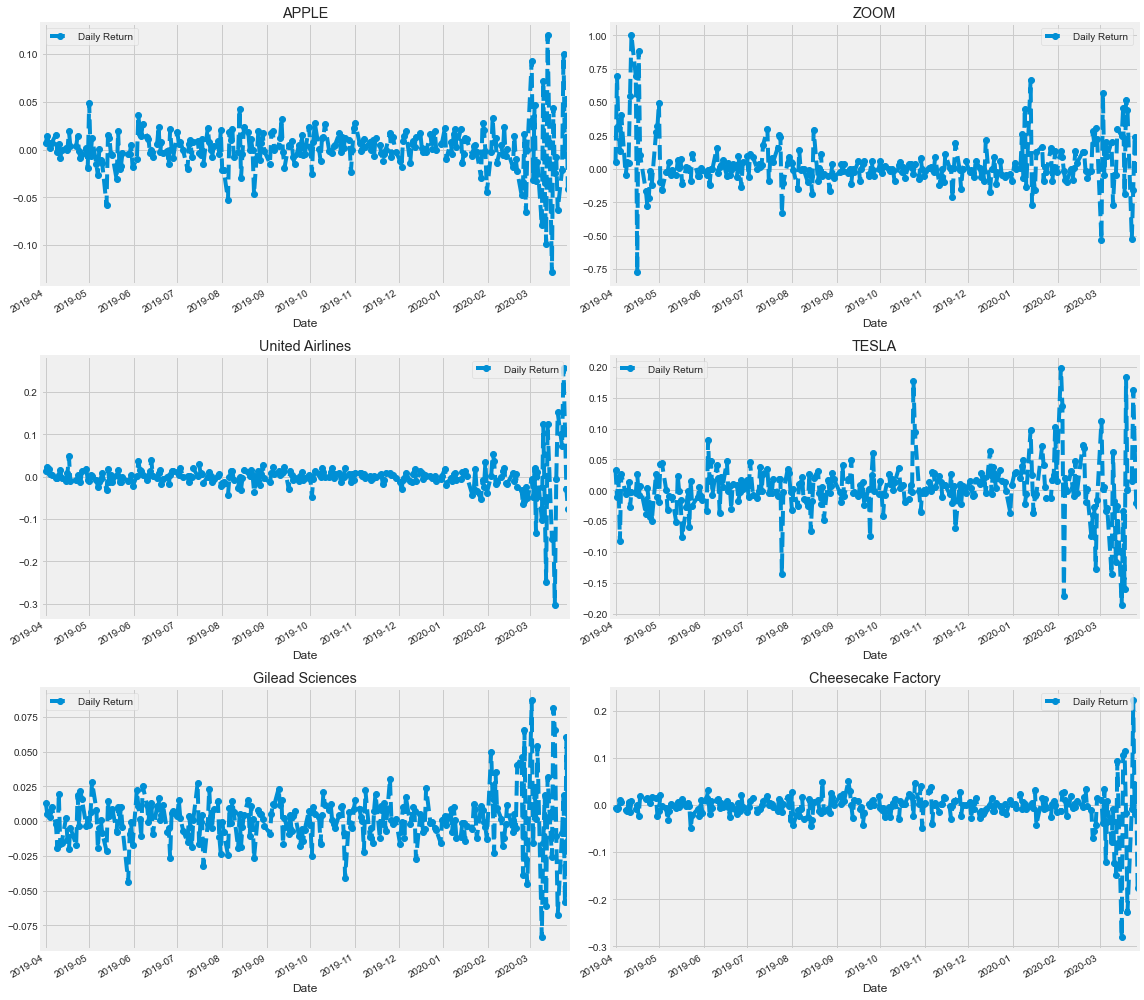

In [18]:
for company in comp_list:
    st1['Daily Return'] = st1['Adj Close'].pct_change()
    st2['Daily Return'] = st2['Adj Close'].pct_change()
    st3['Daily Return'] = st3['Adj Close'].pct_change()
    st4['Daily Return'] = st4['Adj Close'].pct_change()    
    st5['Daily Return'] = st5['Adj Close'].pct_change()
    st6['Daily Return'] = st6['Adj Close'].pct_change()
    
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(14)
fig.set_figwidth(16)

st1['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

st2['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('ZOOM')

st3['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('United Airlines')

st4['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

st5['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Gilead Sciences')

st6['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Cheesecake Factory')

fig.tight_layout()

After the baseline analysis, we can dig deeper to analyze the risk of the stock. Daily returns are displayed against time in the above visualization. The Daily average return has been fluctuating for all these stocks in the past month.

**Creating a histogram for Avg. Daily returns**

average daily return:-0.002607874777102336


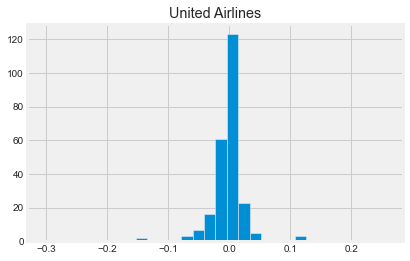

average daily return:-0.0035791009898915502


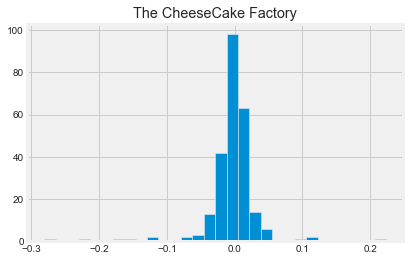

average daily return:0.001357419159678466


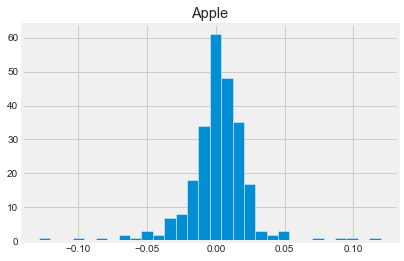

average daily return:0.0034694347593244206


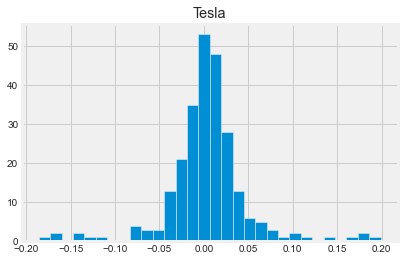

average daily return:0.03162361204336194


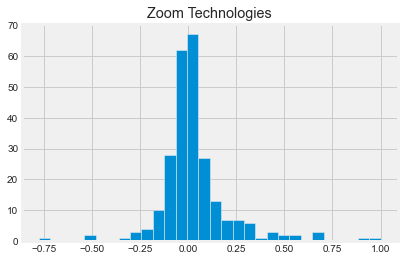

average daily return:0.000652493983226091


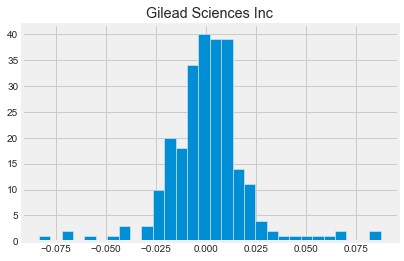

In [19]:
all_company = list(set(list(data['CompanyName'])))
for company in all_company:
    dd =data[data['CompanyName']==company].reset_index(drop=True)
    dd['return'] = (dd['Close'] - dd['Close'].shift(1))/dd['Close'].shift(1)
    print('average daily return:{}'.format(dd['return'].mean()))
    plt.title(company)
    dd['return'].hist(bins=30)
    plt.show()

Through comparison ,Zoom techonologies has the highest average daily return in the recent year.

#### Correlation between the stock's closing prices

* Building a dataframe with all ['Adj Close'] columns for these stocks. 

In [20]:
ddd = pd.DataFrame()
for company in all_company:
    dd =data[data['CompanyName']==company].reset_index(drop=True)
    dd[company+'_return'] = (dd['Adj Close'] - dd['Adj Close'].shift(1))/dd['Adj Close'].shift(1)
    ddd = pd.concat([ddd,dd[[company+'_return']]],axis=1)
ddd = ddd.dropna()

In [21]:
ddd.corr()

,United Airlines_return,The CheeseCake Factory_return,Apple_return,Tesla_return,Zoom Technologies_return,Gilead Sciences Inc_return
United Airlines_return,1.000000,0.315999,0.520799,0.467179,-0.015411,-0.024471
The CheeseCake Factory_return,0.315999,1.000000,0.622571,0.274926,-0.130083,0.407343
Apple_return,0.520799,0.622571,1.000000,0.453033,-0.042717,0.450793
Tesla_return,0.467179,0.274926,0.453033,1.000000,0.006726,0.167714
Zoom Technologies_return,-0.015411,-0.130083,-0.042717,0.006726,1.000000,-0.126365
Gilead Sciences Inc_return,-0.024471,0.407343,0.450793,0.167714,-0.126365,1.000000


* Plotting a correlation plot to get actual numerical values for the correlation between the stocks' daily return values. 

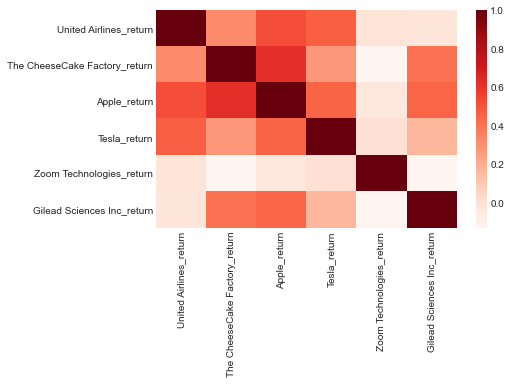

In [22]:
import seaborn as sns

sns.heatmap(ddd.corr(), cmap='Reds')

Although there are no major correlation visible, its surprising to see Apple and CheeseCake Factory having the highest correlation value.

# 4.Forecast Model  

## 4.1 Introduction 

Autoregressive Integrated Moving Average (ARIMA) Model converts non-stationary data to stationary data before working on it. The goal is to train an ARIMA model with optimal parameters that will forecast the closing price of the stocks on the test data.

In [23]:
import os
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


We need to check if a series is stationary or not because time series analysis only works with stationary data.

* ADF (Augmented Dickey-Fuller) Test

This test can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

* Null Hypothesis: The series has a unit root (value of a =1)

* Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

* We will consider three stocks for forecasting. Tesla, United Airlines & Cheesecake Factory.

In [24]:
apple_close = st1['Adj Close']
zoom_close = st2['Adj Close']
ual_close  = st3['Adj Close']
tesla_close = st4['Adj Close']
gilead_close = st5['Adj Close']
cake_close = st6['Adj Close']


* Checking for Stationarity

**Tesla**

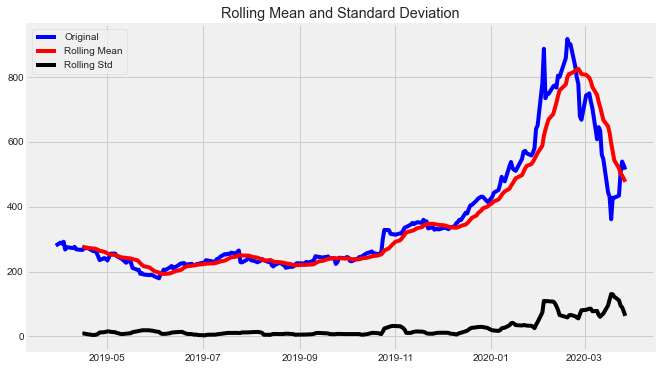

Results of the  test
Test Statistics                 -1.747052
p-value                          0.407047
No. of lags used                16.000000
Number of observations used    235.000000
critical value (1%)             -3.458487
critical value (5%)             -2.873919
critical value (10%)            -2.573367
dtype: float64


In [25]:
from finalscript import test_stationarity

test_stationarity(tesla_close)


**United Airlines**

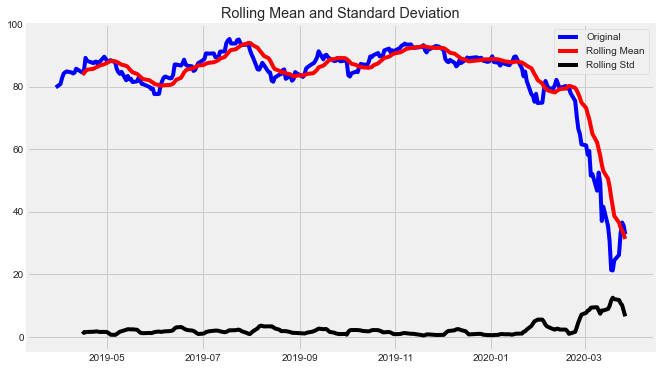

Results of the  test
Test Statistics                  0.563570
p-value                          0.986682
No. of lags used                 7.000000
Number of observations used    244.000000
critical value (1%)             -3.457438
critical value (5%)             -2.873459
critical value (10%)            -2.573122
dtype: float64


In [26]:
from finalscript import test_stationarity
test_stationarity(ual_close)    


**CheeseCake Factory**

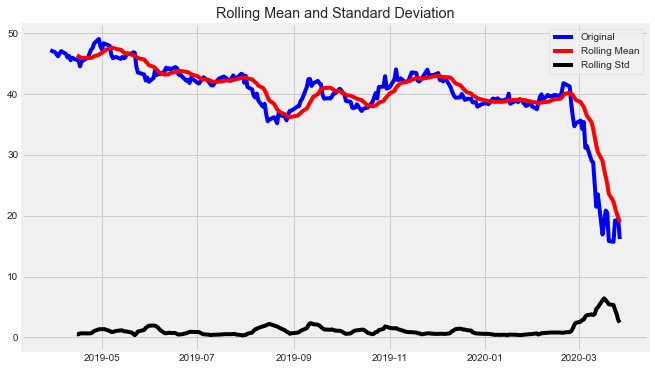

Results of the  test
Test Statistics                  0.241817
p-value                          0.974512
No. of lags used                 8.000000
Number of observations used    243.000000
critical value (1%)             -3.457551
critical value (5%)             -2.873509
critical value (10%)            -2.573148
dtype: float64


In [27]:
from finalscript import test_stationarity
test_stationarity(cake_close)

We see that the p-value is greater than 0.05 in all cases. So we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

## 4.2 Evaluating Performance 

#### 1.)TESLA

* Separating Trend & Seasonality

<Figure size 720x432 with 0 Axes>

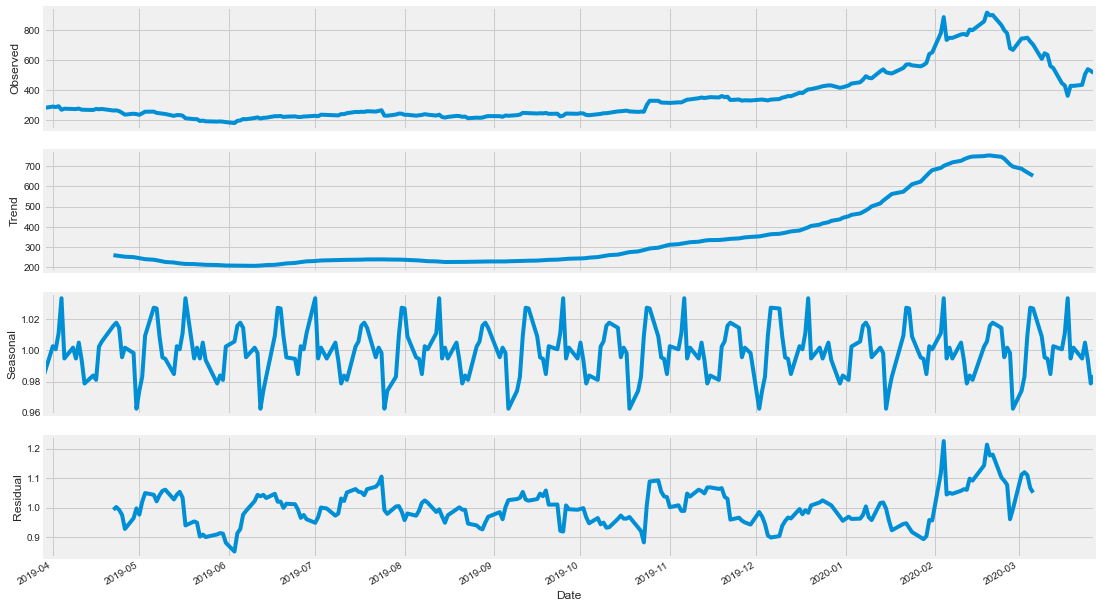

In [28]:
result = seasonal_decompose(tesla_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series.
Calculating the moving average after getting the log

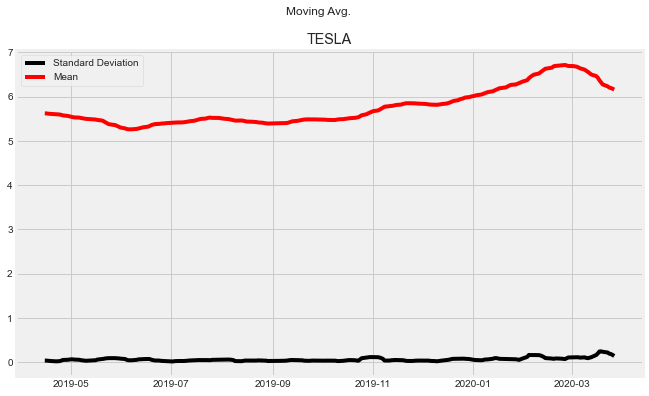

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
tesla_log = np.log(tesla_close)
moving_avg = tesla_log.rolling(12).mean()
std_dev = tesla_log.rolling(12).std()

plt.title('TESLA')
plt.suptitle('Moving Avg.')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Creating an ARIMA model that will train the data with the adjusted closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

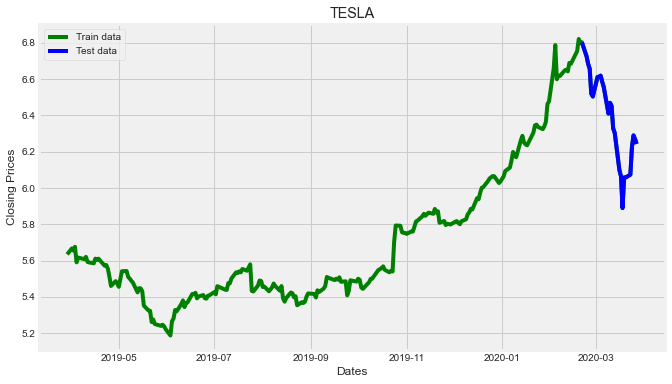

In [30]:
#split data into train and training set

train_data, test_data = tesla_log[3:int(len(tesla_log)*0.9)], tesla_log[int(len(tesla_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title('TESLA')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(tesla_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

We decided to take the value of p,d & q as 3,2,1 after many iterations. These are the optimal parameters we will use for forecasting the stock prices.

In [31]:
model = ARIMA(train_data, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.Adj Close   No. Observations:                  221
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 418.780
Method:                       css-mle   S.D. of innovations              0.036
Date:                Sun, 29 Mar 2020   AIC                           -825.560
Time:                        22:12:51   BIC                           -805.172
Sample:                             2   HQIC                          -817.328
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0001   3.27e-05      4.078      0.000    6.93e-05       0.000
ar.L1.D2.Adj Close    -0.0029      0.068     -0.043      0.966      -0.136       0.130
ar.L2.D2.Adj Close  

* Forecasting the stock prices on the test dataset keeping 95% condifence level

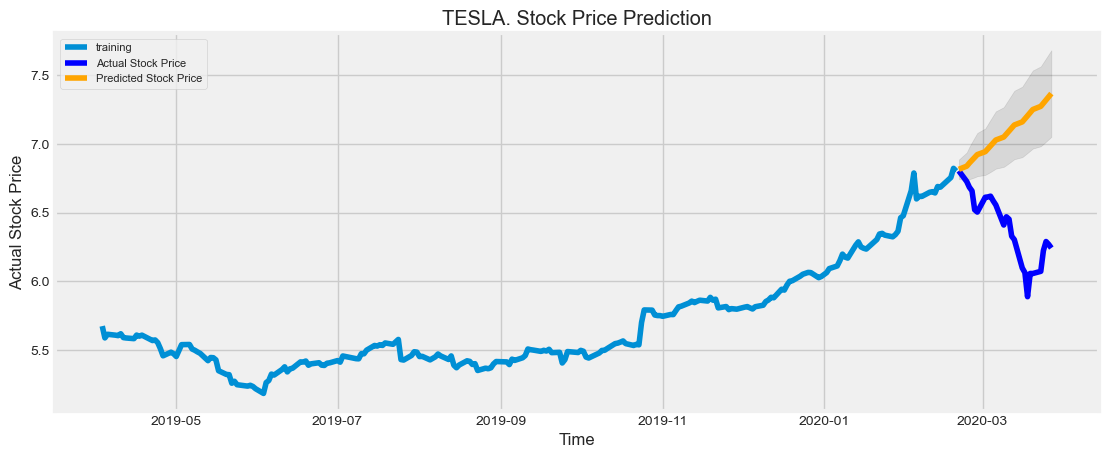

In [32]:
# Forecast
fc, se, conf = fitted.forecast(26, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('TESLA. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### 2.) United Airlines

* Separating Trend & Seasonality

<Figure size 720x432 with 0 Axes>

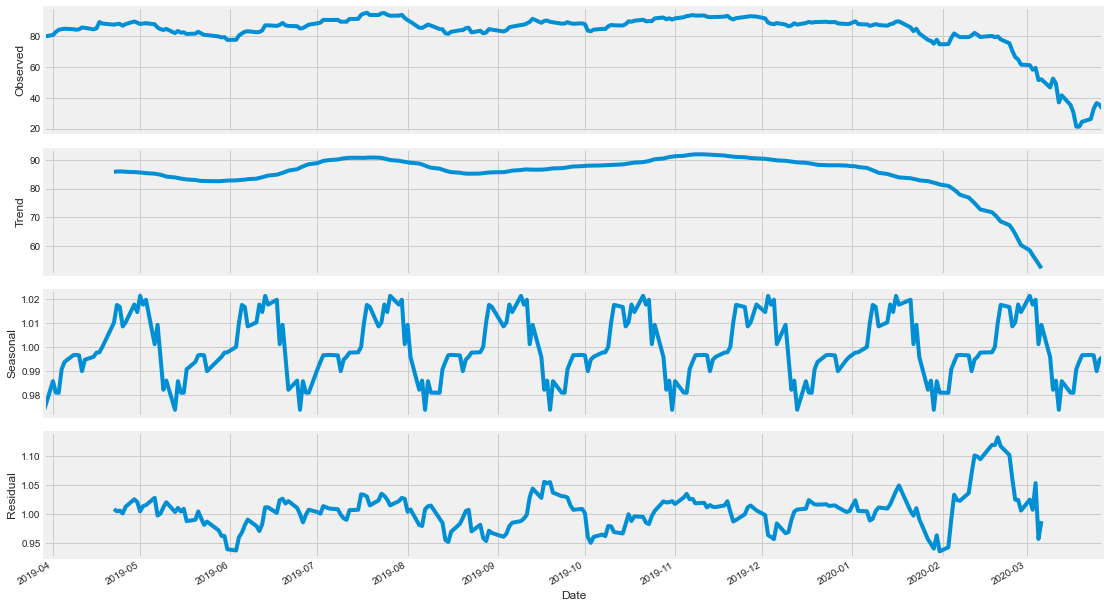

In [33]:
result2 = seasonal_decompose(ual_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result2.plot()  
fig.set_size_inches(16, 9)

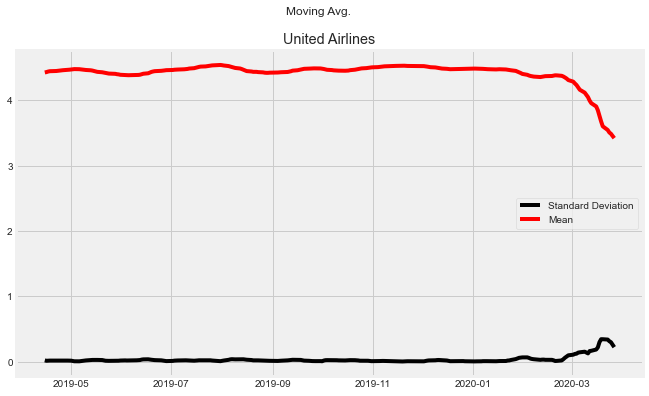

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
ual_log = np.log(ual_close)
moving_avg2 = ual_log.rolling(12).mean()
std_dev2 = ual_log.rolling(12).std()

plt.title('United Airlines')
plt.suptitle('Moving Avg.')
plt.plot(std_dev2, color ="black", label = "Standard Deviation")
plt.plot(moving_avg2, color="red", label = "Mean")
plt.legend()
plt.show()

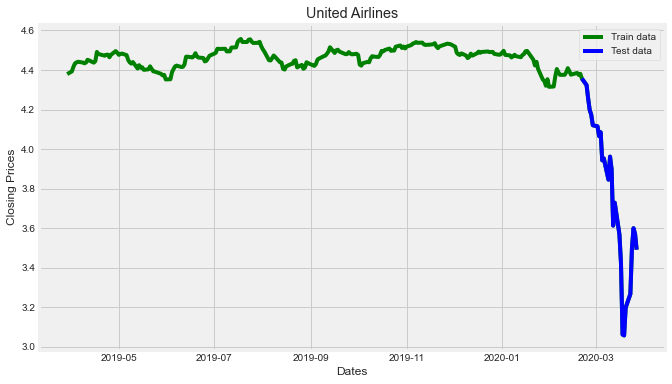

In [35]:
#split data into train and training set

train_data2, test_data2 = ual_log[3:int(len(ual_log)*0.9)], ual_log[int(len(ual_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title('United Airlines')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(ual_log, 'green', label='Train data')
plt.plot(test_data2, 'blue', label='Test data')
plt.legend()

In [36]:
model = ARIMA(train_data2, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.Adj Close   No. Observations:                  221
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 610.564
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sun, 29 Mar 2020   AIC                          -1209.128
Time:                        22:13:14   BIC                          -1188.739
Sample:                             2   HQIC                         -1200.895
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.364e-05   1.73e-05     -0.789      0.431   -4.75e-05    2.02e-05
ar.L1.D2.Adj Close     0.1081      0.067      1.606      0.110      -0.024       0.240
ar.L2.D2.Adj Close  

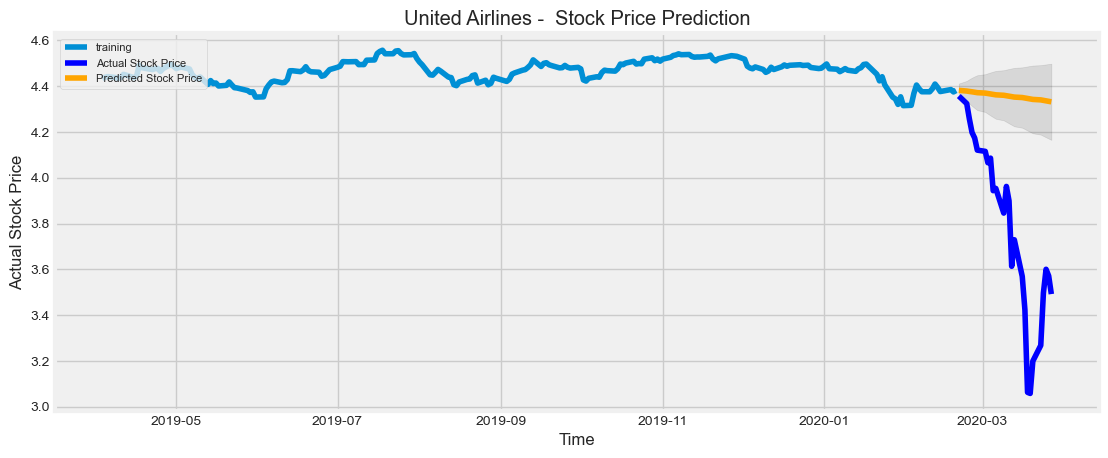

In [37]:
# Forecast
fc, se, conf = fitted.forecast(26, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data2.index)
lower_series = pd.Series(conf[:, 0], index=test_data2.index)
upper_series = pd.Series(conf[:, 1], index=test_data2.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data2, label='training')
plt.plot(test_data2, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('United Airlines -  Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### 3.) Cheese Cake Factory

<Figure size 720x432 with 0 Axes>

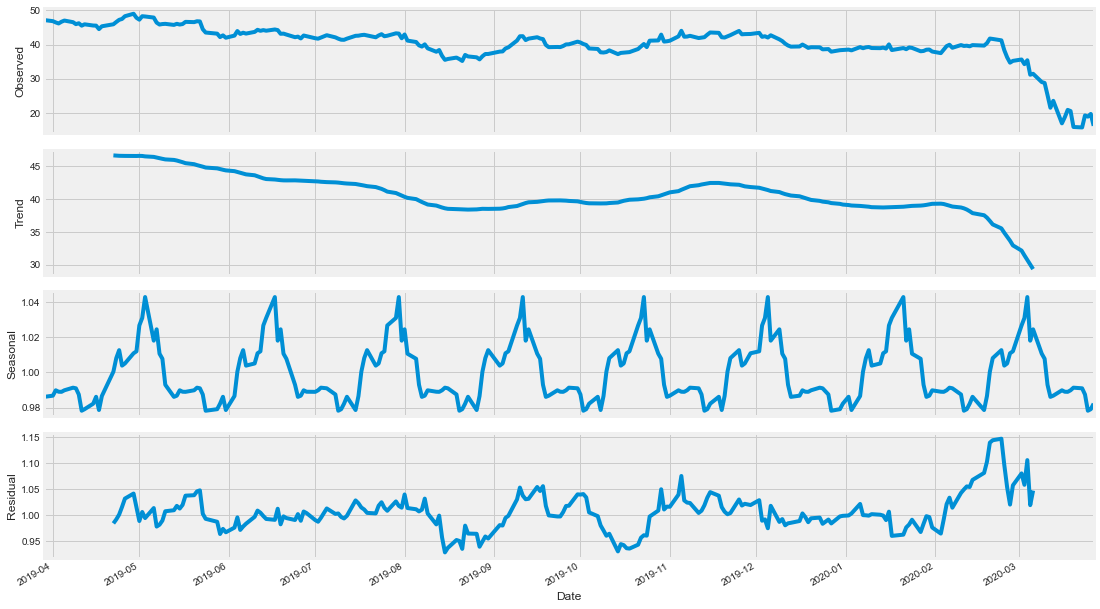

In [38]:
result3 = seasonal_decompose(cake_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result3.plot()  
fig.set_size_inches(16, 9)

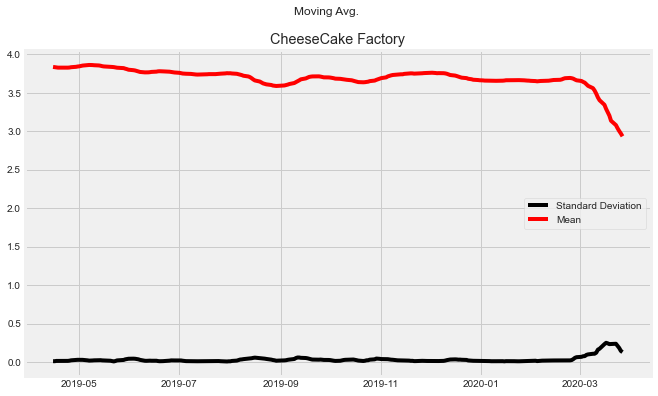

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
cake_log = np.log(cake_close)
moving_avg3 = cake_log.rolling(12).mean()
std_dev3 = cake_log.rolling(12).std()

plt.title('CheeseCake Factory')
plt.suptitle('Moving Avg.')
plt.plot(std_dev3, color ="black", label = "Standard Deviation")
plt.plot(moving_avg3, color="red", label = "Mean")
plt.legend()
plt.show()

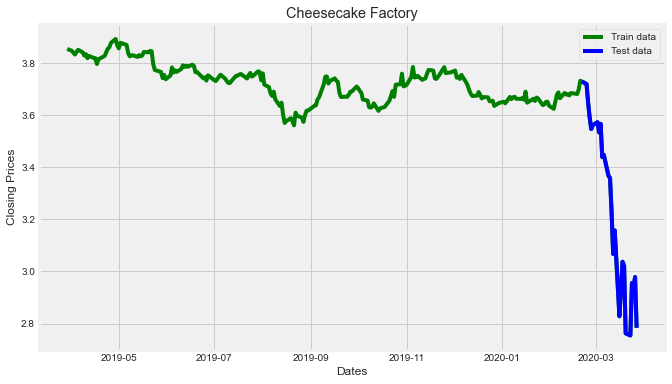

In [23]:
#split data into train and training set

train_data3, test_data3 = cake_log[3:int(len(cake_log)*0.9)], cake_log[int(len(cake_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title('Cheesecake Factory')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(cake_log, 'green', label='Train data')
plt.plot(test_data3, 'blue', label='Test data')
plt.legend()

In [24]:
model = ARIMA(train_data3, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.Adj Close   No. Observations:                  221
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 577.650
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sun, 29 Mar 2020   AIC                          -1143.300
Time:                        17:23:11   BIC                          -1122.911
Sample:                             2   HQIC                         -1135.067
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.45e-05   1.78e-05      0.814      0.417   -2.04e-05    4.94e-05
ar.L1.D2.Adj Close    -0.0491      0.068     -0.724      0.470      -0.182       0.084
ar.L2.D2.Adj Close  

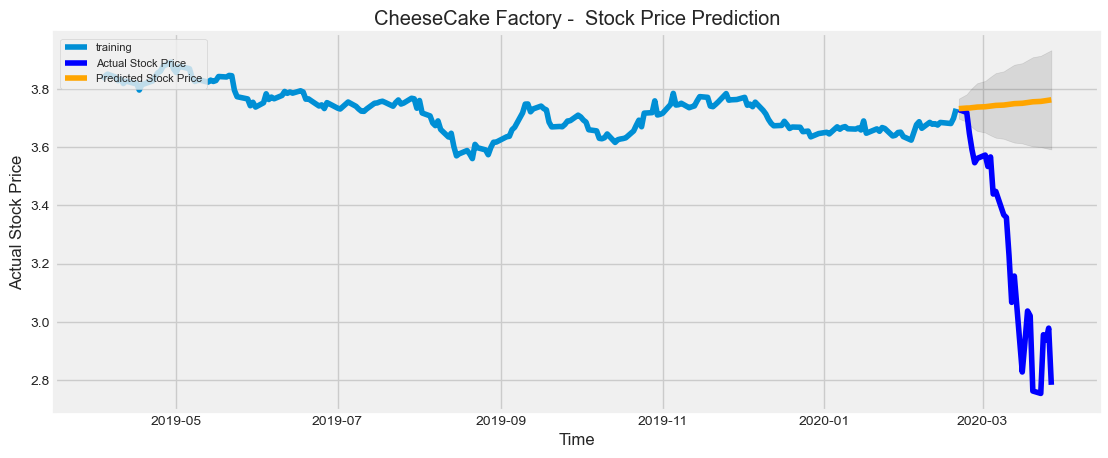

In [25]:
# Forecast
fc, se, conf = fitted.forecast(26, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data3.index)
lower_series = pd.Series(conf[:, 0], index=test_data3.index)
upper_series = pd.Series(conf[:, 1], index=test_data3.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data3, label='training')
plt.plot(test_data3, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('CheeseCake Factory -  Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 4.3 Analyzing Results 

* TESLA

In [26]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 7.043899062759679
MAE: 2.642086560823643
RMSE: 2.6540344878617685
MAPE: 0.4126179764523404


#### Mean Absolute Percentage Error: 11.1% implies the model is 88.9% accurate in predicting the test observations

* United Airlines

In [27]:
# report performance
mse = mean_squared_error(test_data2, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data2, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data2, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data2)/np.abs(test_data2))
print('MAPE: '+str(mape))

MSE: 0.1525823752441386
MAE: 0.3433186626520716
RMSE: 0.39061794024870206
MAPE: 0.09257682841586687


#### Mean Absolute Percentage Error: 9.25% implies the model is 90.75% accurate in predicting the test observations

* Cheesecake Factory

In [28]:
# report performance
mse = mean_squared_error(test_data3, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data3, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data3, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data3)/np.abs(test_data3))
print('MAPE: '+str(mape))

MSE: 0.35461582434399563
MAE: 0.4961819232039378
RMSE: 0.5954962840723657
MAPE: 0.16439311640648974


#### Mean Absolute Percentage Error: 16.4% implies the model is 83.6% accurate in predicting the test observations

# 5.Conclusion  

* Performed EDA on real-time stock data from Yahoo Finance. Mix of companies were chosen that saw significant changes in    Quarter 1 , 2020.

* Estimated daily average returns for each stock to determine the risk in investing.

* Calculated moving averages to help shed light into sudden fluctuations in the stocks over a period of time.

* Designed a correlation matrix to assess if any stocks showed correlation among each other.

* Build a forecast model to show the trend for stocks that saw huge increases and huge decreases.